In [17]:
import numpy as np
import matplotlib.pyplot as plt

def read_vcf_file(vcf_file_address):
    """
    Assumption: VCF for one individual and all variants are called.  
    
    Reading the vcf file
    input: vcf file
    outputs:
            lines_list: list of string. each string is a line of phased vcf file.
            var_pos_list: genomic position of variants in the vcf file.
    """

    vcf_file = open(vcf_file_address,'r')
    lines_list=[]         
    var_pos_list=[]  
    
    for line in vcf_file:
        line_strip = line.strip()
        lines_list.append(line_strip)
        if line_strip.startswith('#'):
            pass
            #header_lines_list.append(line_strip)
            #sample_names = line_strip.split('\t')[9:11]            # last line of header contains sample name
        else:
            line_parts=line_strip.split('\t')
            chrom = line_parts[0]
            var_pos = int(line_parts[1])                           # genomic position of variants
            var_pos_list.append(var_pos)
    return var_pos_list


In [70]:
folder = "/scratch/smajidi1/hac/"
vcf_file_address = folder+ "hprc_chr22.vcf"
var_pos_list = read_vcf_file(vcf_file_address)

diff_list = []
for i in range(1,len(var_pos_list)):
    diff = var_pos_list[i]-var_pos_list[i-1]
    diff_list.append(diff)
    
print("Number of variants in the VCF is ",len(diff_list)+1)
print("Mean of genomic distance", round(np.mean(diff_list),3),"bp, max distance", np.max(diff_list),"bp, and min distance is", np.min(diff_list))

print("Max could be due to N positions.")


Number of variants in the VCF is  98943
Mean of genomic distance 407.288 bp, max distance 2512818 bp, and min distance is 1
Max could be due to N positions.


In [79]:
max_value=np.max(diff_list)
for i in range(1,len(var_pos_list)):
    diff = var_pos_list[i]-var_pos_list[i-1]
    if diff== max_value:
        print("The max distance is happening between variants indecis",i-1,"and the next one, which are at positions",var_pos_list[i-1],"and", var_pos_list[i])


The max distance is happening between variants indecis 18266 and the next one, which are at positions 12641590 and 15154408


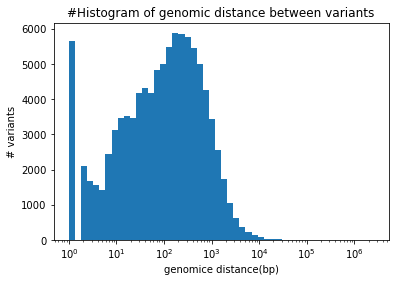

In [80]:
hist, bins = np.histogram(diff_list, bins=50)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(diff_list, bins=logbins)
plt.xscale('log')

plt.title('#Histogram of genomic distance between variants')
plt.xlabel("genomice distance(bp)")
plt.ylabel("# variants")
plt.show()

Text(0, 0.5, '# variants')

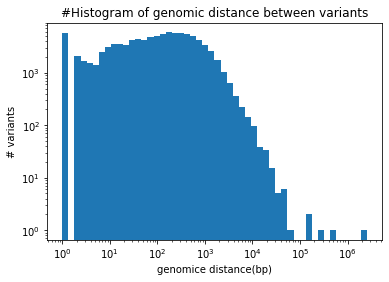

In [81]:
hist, bins = np.histogram(diff_list, bins=50)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(diff_list, bins=logbins)
plt.loglog()

plt.title('#Histogram of genomic distance between variants')
plt.xlabel("genomice distance(bp)")
plt.ylabel("# variants")


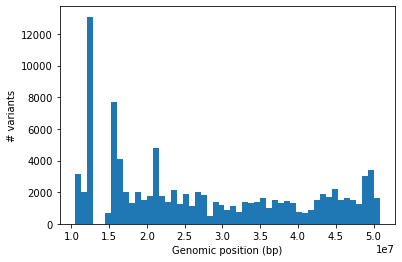

In [82]:

step= 1e6
num_bucket= int(np.max(var_pos_list)/step)+1


plt.hist(var_pos_list, bins=num_bucket)
plt.ylabel("# variants")
plt.xlabel("Genomic position (bp)")
plt.show()
